# Simple visualizations of the time series concept

## Necessary Imports

In [167]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import music21 as m21
from matplotlib.ticker import MultipleLocator
m21.environment.set('musescoreDirectPNGPath', '/Applications/MuseScore 4.app/Contents/MacOS/mscore')

## Load simple song

In [3]:
song = m21.converter.parse('Twinkle Twinkle Little Star.mid')

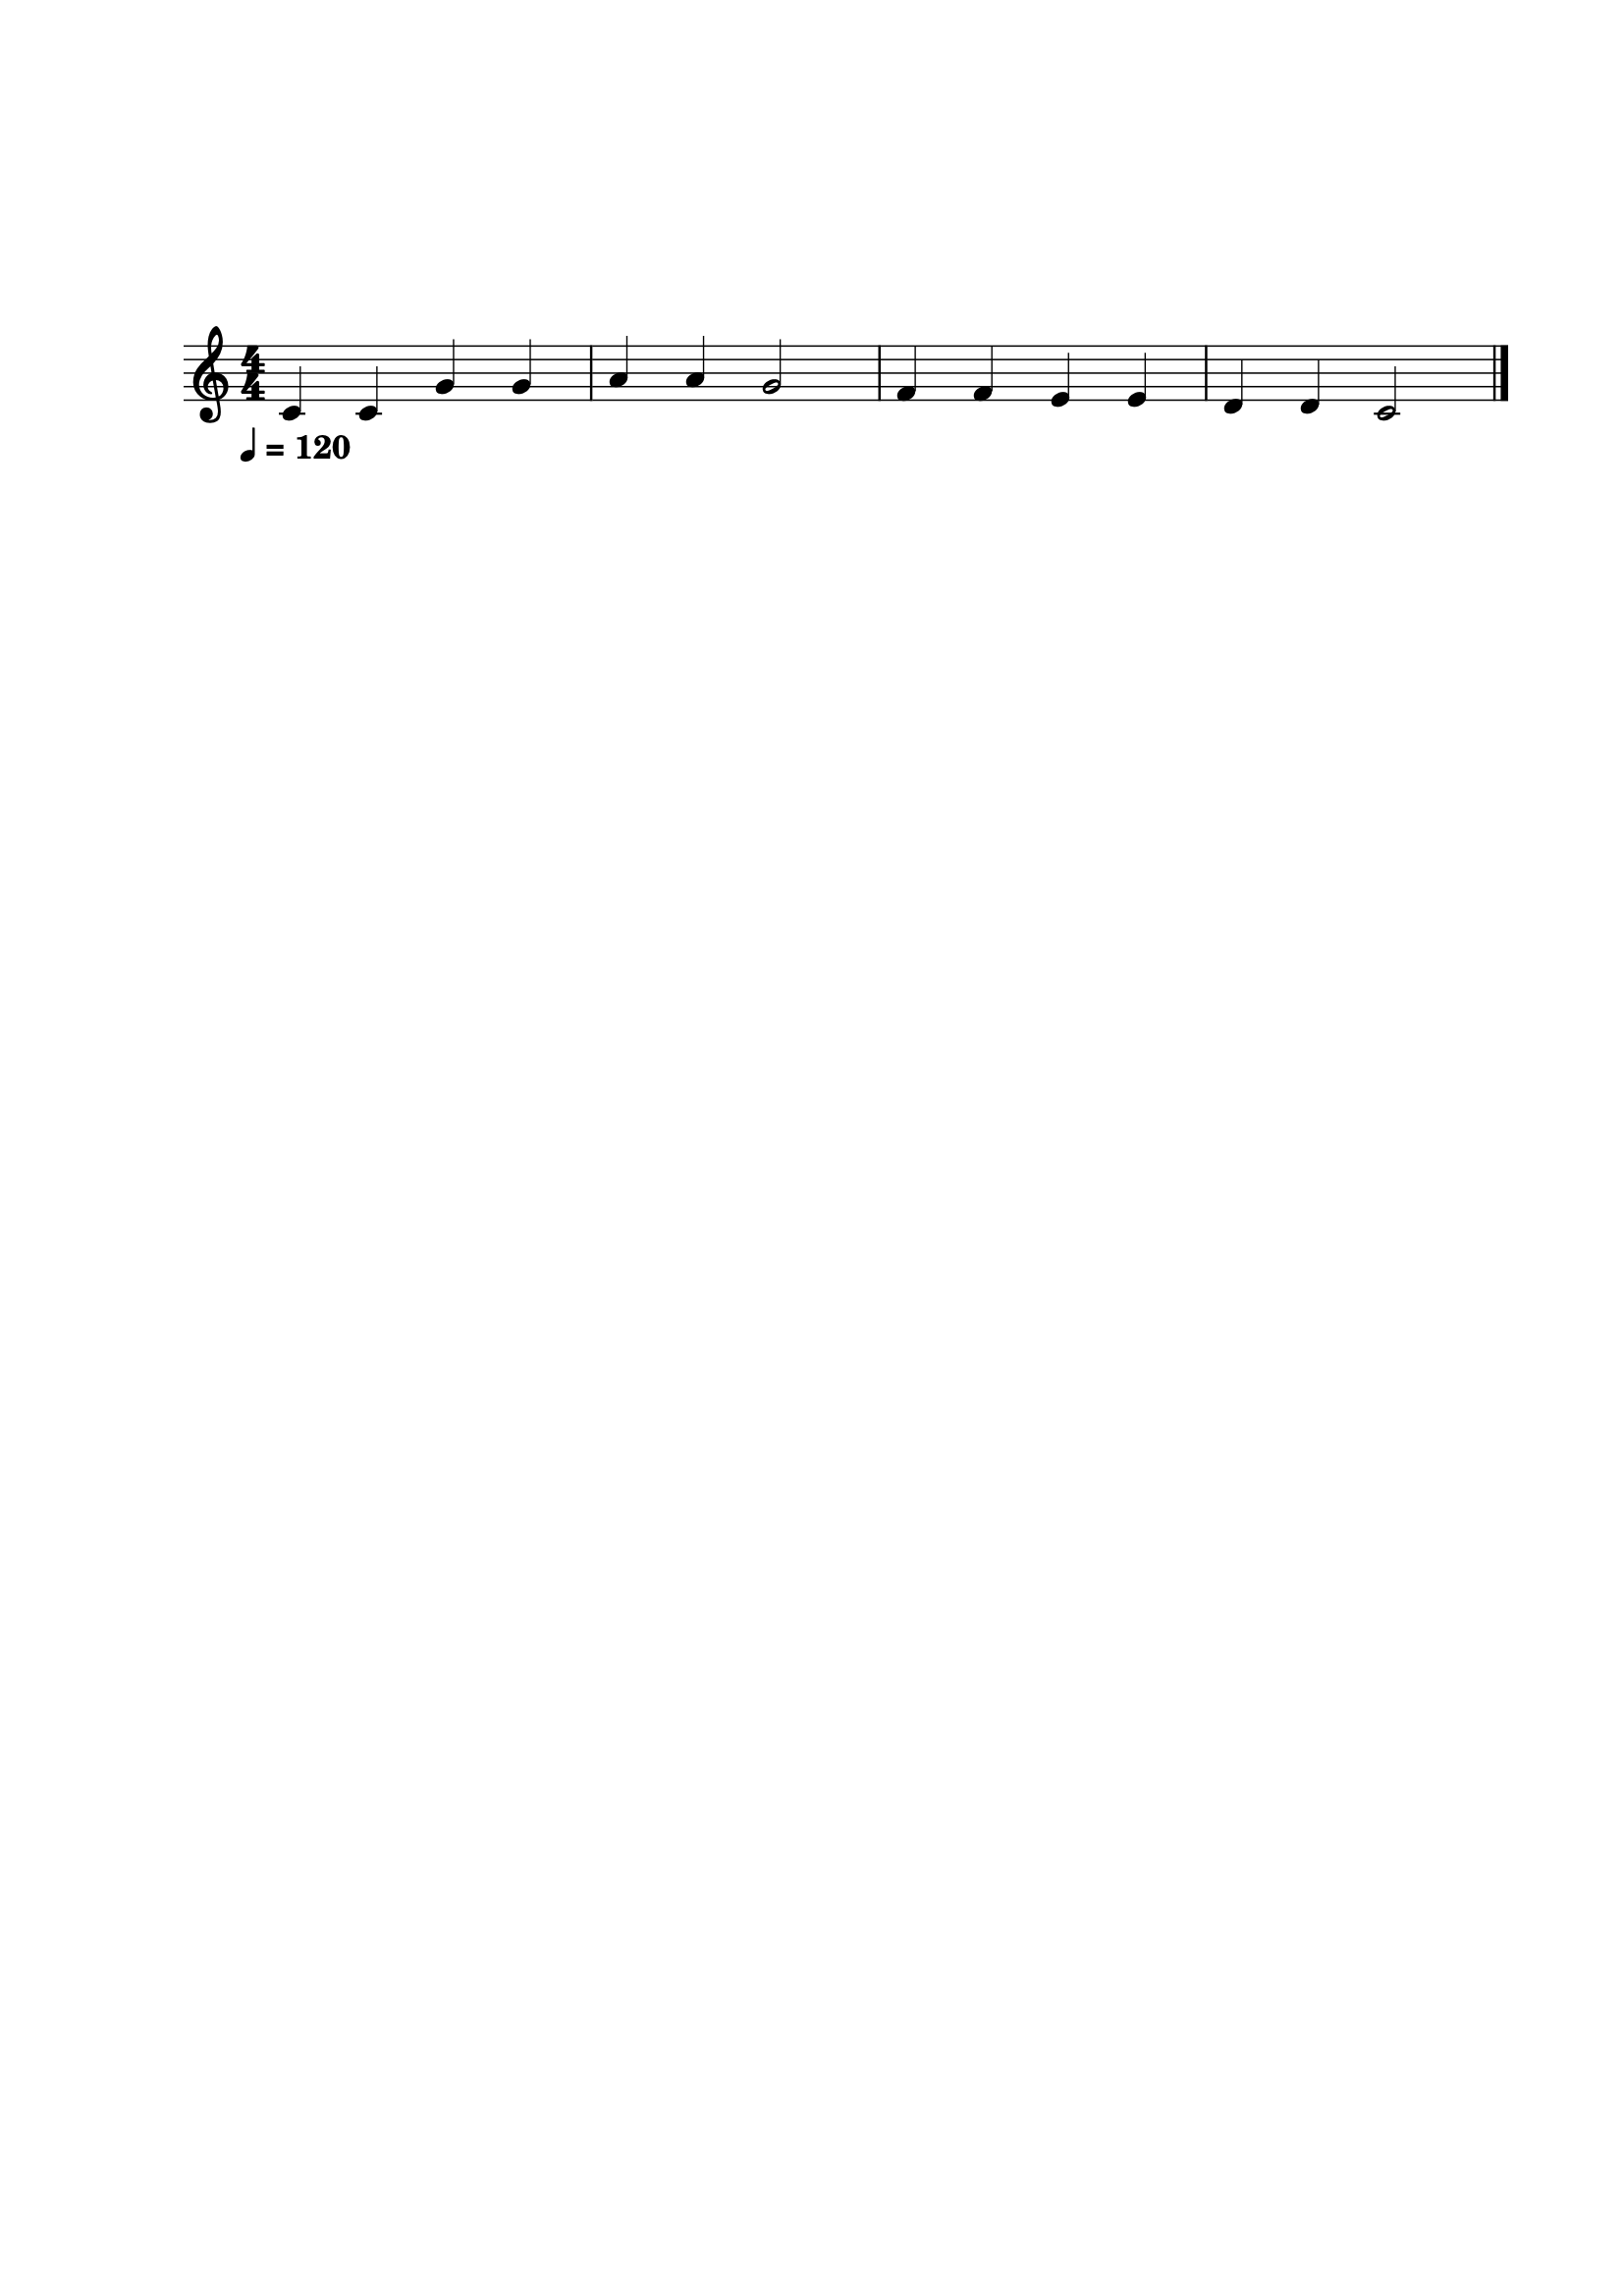

In [208]:
song.show()

## Create dataframe from pitch and duration of notes

In [210]:
pitch = []
time = []
for note in song.flatten().notes:
    pitch.append(note.pitch.midi)
    time.append(note.duration.quarterLength)
df = pd.DataFrame({'pitch':pitch, 'time':time})
df['time_cumsum'] = df.time.cumsum().shift(1).fillna(0)

In [211]:
df

,pitch,time,time_cumsum
0,60,1.0,0.0
1,60,1.0,1.0
2,67,1.0,2.0
3,67,1.0,3.0
4,69,1.0,4.0
5,69,1.0,5.0
6,67,2.0,6.0
7,65,1.0,8.0
8,65,1.0,9.0
9,64,1.0,10.0


## Scatterplot of pitch and time (in quarternotes)

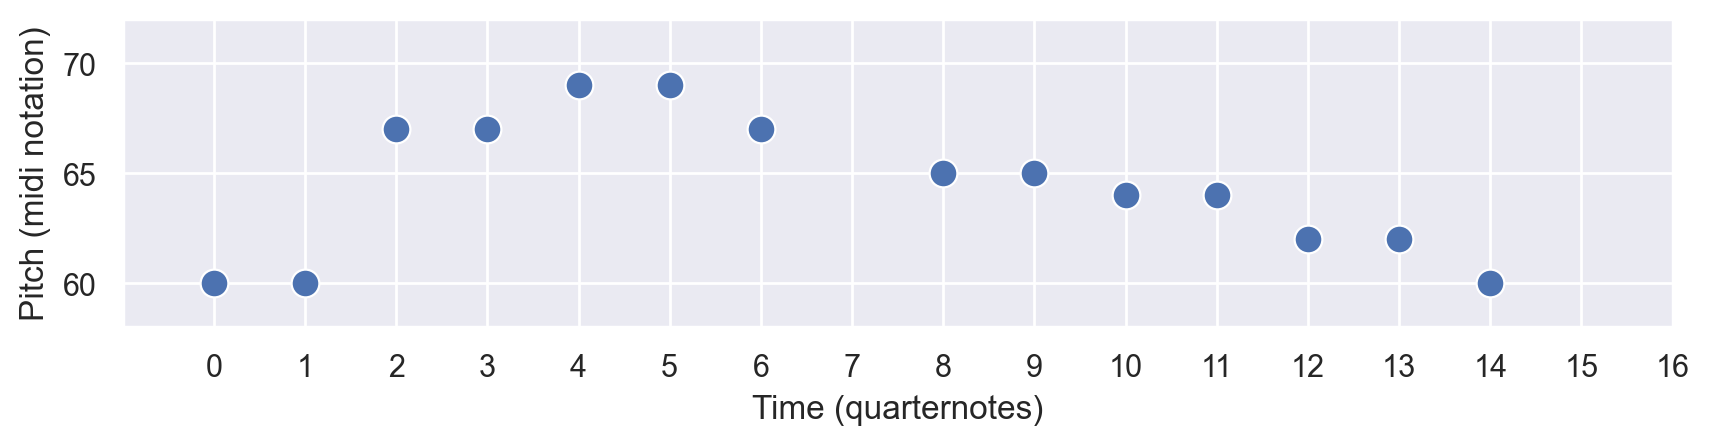

In [135]:
sns.set_theme(style="darkgrid")
plt.figure(figsize = (10,2))
sns.scatterplot(data = df, x = 'time_cumsum', y = 'pitch', s = 100)
plt.xlim(-1, 16)
plt.ylim(58, 72)
plt.xticks(range(0,17))
plt.xlabel('Time (quarternotes)')
plt.ylabel('Pitch (midi notation)')
plt.savefig('Twinkle Plot.png', dpi=600, transparent=False, bbox_inches='tight', format='png')
plt.show()

## Add information of 16th notes

In [212]:
df['time_16th'] = df.time_cumsum.mul(4)
ringings = [i for i in range(16*4) if i not in df.time_16th.values]
pitches_plot = []
time_plot = []
pitches_16th = []
for pitch, time in df[['pitch','time']].values:
    for i in range(4*int(time)):
        pitches_16th.append(pitch)
for i, pitch in enumerate(pitches_16th):
    if i in ringings:
        pitches_plot.append(pitch)
        time_plot.append(i)
df_16th = pd.DataFrame({'pitch': pitches_plot, 'time':time_plot})

## Scatterplot of pitch and time (in 16th notes). Duration is added

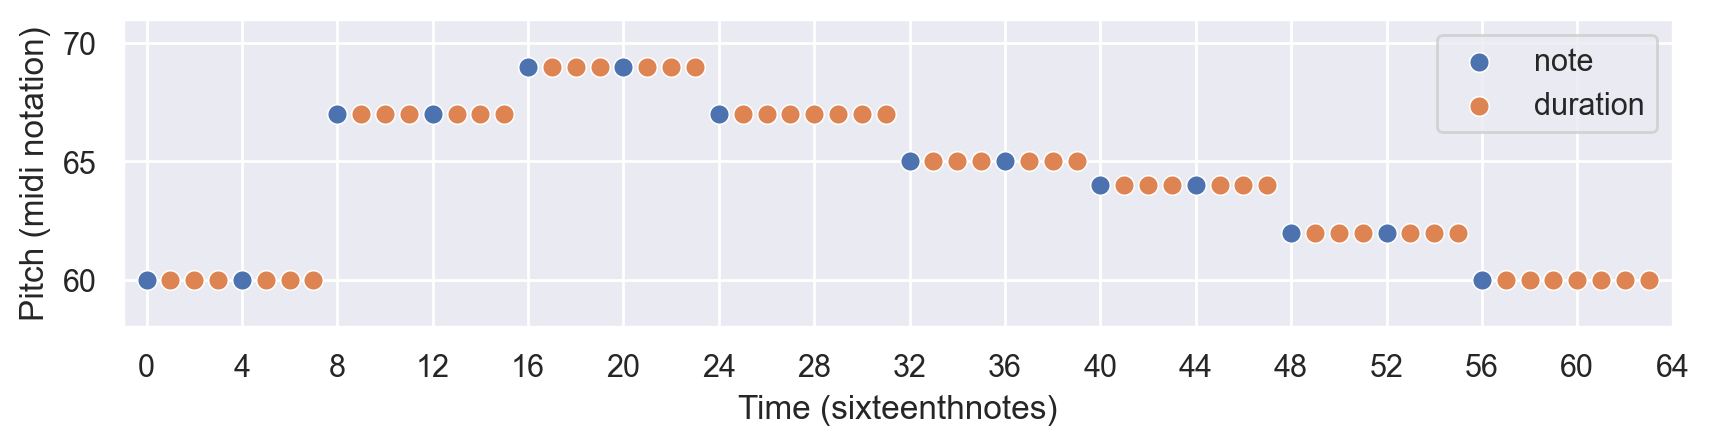

In [200]:
sns.set_style('darkgrid')
plt.figure(figsize = (10,2))
sns.scatterplot(data = df, x = 'time_16th', y = 'pitch', s = 50, label = 'note')
sns.scatterplot(data = df_16th, x = 'time', y = 'pitch', s = 50, label = 'duration')
plt.xlim(-1, 16*4)
plt.ylim(58, 71)
plt.xticks(range(0,16*4+1))
plt.xlabel('Time (sixteenthnotes)')
plt.ylabel('Pitch (midi notation)')
major_locator = MultipleLocator(base=4)
plt.gca().xaxis.set_major_locator(major_locator)
plt.savefig('Twinkle Plot 16.png', dpi=600, transparent=False, bbox_inches='tight', format='png')
plt.show()

## "Piano" plot

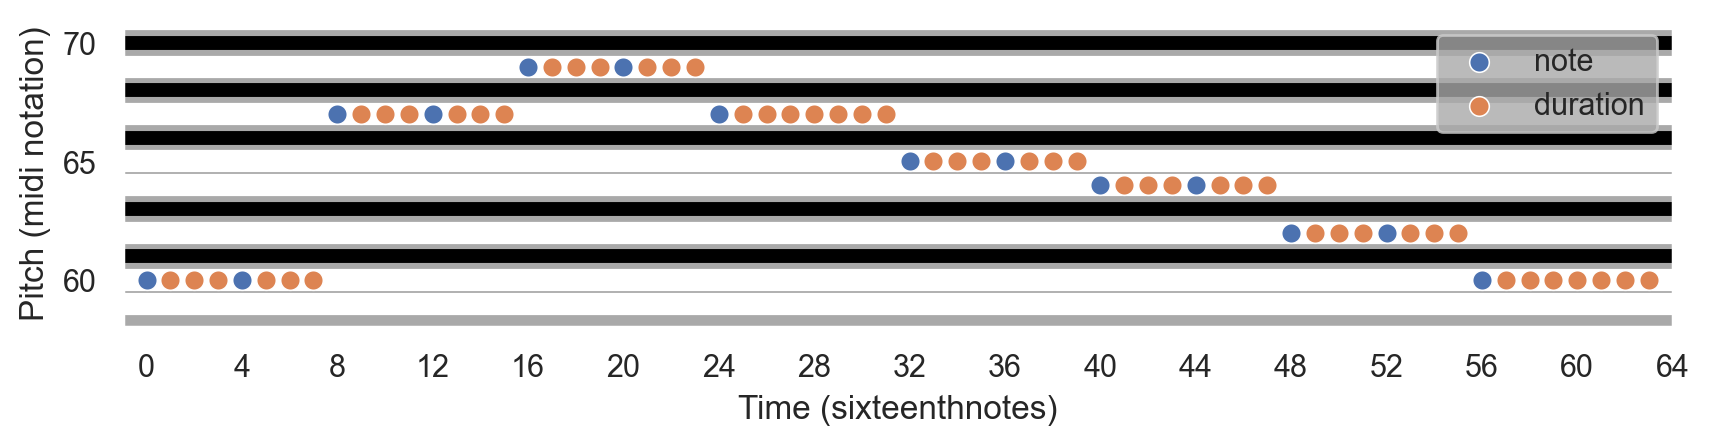

In [213]:
sns.set_style('dark')
sns.set_style(rc = {'axes.facecolor': 'darkgray'})
plt.figure(figsize = (10,2))
for i in range(59, 72):
    if i%12 in [0,2,4,5,7,9,11]:
        plt.axhline(y = i, color = 'white', lw = 8, zorder = 0)
    else:
        plt.axhline(y = i, color = 'black', lw = 5, zorder = -1)

sns.scatterplot(data = df, x = 'time_16th', y = 'pitch', s = 50, label = 'note')
sns.scatterplot(data = df_16th, x = 'time', y = 'pitch', s = 50, label = 'duration')
plt.xlim(-1, 16*4)
plt.ylim(58, 71)
plt.xticks(range(0,16*4+1))
plt.xlabel('Time (sixteenthnotes)')
plt.ylabel('Pitch (midi notation)')
major_locator = MultipleLocator(base=4)
plt.gca().xaxis.set_major_locator(major_locator)
plt.savefig('Twinkle Plot 16 Piano.png', dpi=600, transparent=False, bbox_inches='tight', format='png')
plt.show()

## Print of the song in time series format

In [214]:
def song_to_time_series(song):
    song_time_series = []
    for note in song.flatten().notesAndRests:
        if isinstance(note, m21.note.Note):
            symbol = note.pitch.midi
        elif isinstance(note, m21.note.Rest):
            symbol = 'R'
        length = int(note.duration.quarterLength/0.25)
        song_time_series.append(symbol)
        if length > 1:
            for i in range(length-1):
                song_time_series.append('-')
    return song_time_series

In [215]:
song_time_series = song_to_time_series(song)

In [216]:
print(song_time_series)

[60, '-', '-', '-', 60, '-', '-', '-', 67, '-', '-', '-', 67, '-', '-', '-', 69, '-', '-', '-', 69, '-', '-', '-', 67, '-', '-', '-', '-', '-', '-', '-', 65, '-', '-', '-', 65, '-', '-', '-', 64, '-', '-', '-', 64, '-', '-', '-', 62, '-', '-', '-', 62, '-', '-', '-', 60, '-', '-', '-', '-', '-', '-', '-']
